<a href="https://colab.research.google.com/github/nojiyoon/SeSAC_code/blob/main/1%EC%9B%9417%EC%9D%BC_Random_Forest_%EC%88%98%EC%97%85_%EB%82%B4%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris data

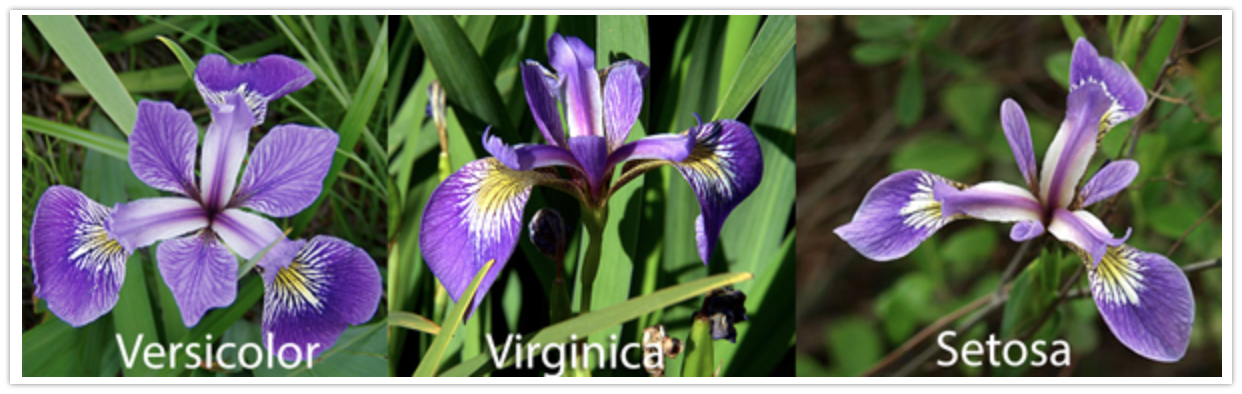

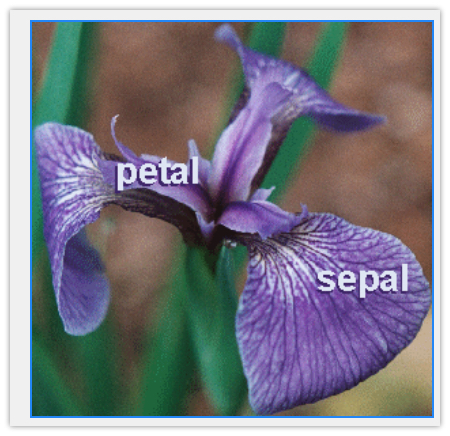

In [1]:
from sklearn.datasets import load_iris

In [2]:
load_iris() # 붓꽃 데이터 리턴 - dict

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [3]:
ir_dic = load_iris()

In [4]:
X = ir_dic['data'] # 독립변수 저장

In [5]:
y = ir_dic.target # 종속변수 저장

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
rfc = RandomForestClassifier(n_estimators=10) # 10개의 Decision Tree를 만들 객체 생성

In [8]:
rfc

RandomForestClassifier(n_estimators=10)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
X_train.shape

(120, 4)

In [12]:
X_test.shape

(30, 4)

In [13]:
y_train.shape

(120,)

In [14]:
y_test.shape

(30,)

In [15]:
rfc.fit(X_train, y_train) # 트리 만들기

RandomForestClassifier(n_estimators=10)

In [16]:
rfc.estimators_[8] # 9번째 Decision Tree

DecisionTreeClassifier(max_features='auto', random_state=610719460)

In [17]:
from sklearn import tree

In [18]:
dt_dot_data = tree.export_graphviz(rfc.estimators_[8],
                     feature_names=['sepal length', 'sepal width', 'petal length', 'petal width'],
                     class_names=['setosa', 'versicolor', 'virginica']) # 9번째 트리 시각화

In [19]:
import pydotplus

In [20]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data) # dt_dot_data(트리내용)을 그림으로 바꿀 객체 생성

In [21]:
dt_graph.create_png()

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xad\x00\x00\x04\x1d\x08\x06\x00\x00\x00tFq\xe4\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xddy\\U\xd5\xde?\xf0\xcf>\x1c8L2\n2E2\x98\x88V>9"\x12\x1a\x04\xe8c\x17\x1cI\r*\xc3\x9fY\xe2u@\xbd\xe5\x94i\xa8A>\xe6\x90\xe5\xadT\xb2\xf2\x80\xa1fZ]\x13P\x06\x01Q\xd4\xbcJ\xe5lrQ&\x19\x94\x83\x02\xeb\xf7G\x0f\xe7\xf1\xc8 \xa3\x07\xe5\xf3~\xbd\xce\xebu\xcf\xda\xdf\xb5\xf7w\x9dc\xd7\xaf\xfb\xac\xbd\x96$\x84\x10 """"\xea\xb8\xe2d\xda\xce\x80\x88\x88\x88\x88\xe8AX\xb4\x12\x11\x11\x11Q\x87\xc7\xa2\x95\x88\x88\x88\x88:<\xb9\xb6\x13 "j\xae\xd8\xd8Xm\xa7@\xf4\xd0L\x980A\xdb)\x10u\x08\x12\x1f\xc4"\xa2G\x8d$I\xdaN\x81\xe8\xa1\xe1_\xd3D\x00\x808\xdei%\xa2G\x92R\xa9\xe4\x1d(z\xac\xc5\xc6\xc6"88X\xdbi\x10u\x18\x9c\xd3JDDDD\x1d\x1e\x8bV""""\xea\xf0X\xb4\x12\x11\x11\x11Q\x87\xc7\xa2\x95\x88\x88\x88\x88:<\x16\xadDDDD\xd4\xe1\xb1h%"\xea\x00\x02\x02\x02`ll\xdc\xea\x98\x8e ((\x08r9\x17\xa7!\xa2\xb6\xc5\xa2\x95\x88\x88:\xb5\x

In [22]:
from IPython.display import Image

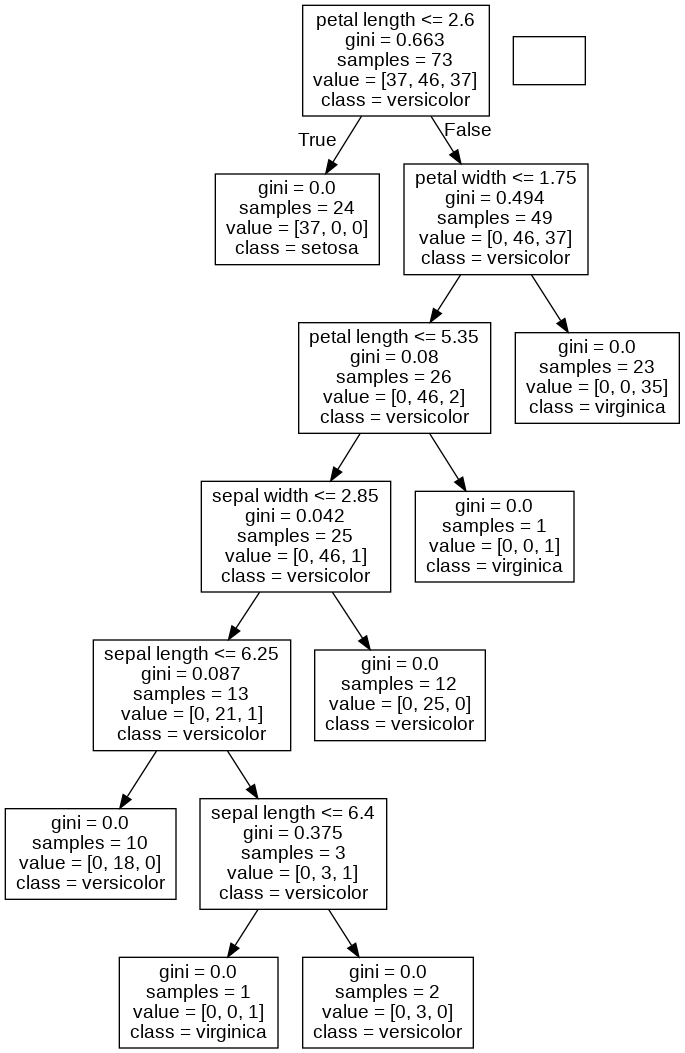

In [23]:
Image(dt_graph.create_png())

In [24]:
dt_graph.write_pdf('9번째 트리 고이고이 간직하리.pdf')

True

In [25]:
# 지니 지수 계산해보기
1 - ((40/120)**2 + (41/120)**2 + (39/120)**2)

0.6665277777777778

# 성능평가

In [26]:
prediction1 = rfc.predict(X_test)

In [27]:
prediction1

array([0, 1, 1, 2, 0, 1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 2, 1, 0, 0, 0, 0, 2,
       2, 1, 0, 1, 1, 0, 1, 1])

In [28]:
y_test

array([0, 1, 1, 2, 0, 1, 0, 1, 2, 0, 1, 2, 0, 1, 1, 2, 1, 0, 0, 0, 0, 2,
       2, 2, 0, 1, 1, 0, 1, 1])

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
print('정확도:', accuracy_score(y_test, prediction1))

정확도: 0.9333333333333333


In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test, prediction1)

array([[11,  0,  0],
       [ 0, 12,  0],
       [ 0,  2,  5]])

# 선생님 결과 예측의 성능 평가하기
- 예측 1의 정밀도(precision): 1로 예측한 데이터 중에서 찐 1의 비율
- 예측 1의 재현율(recall): 찐 1인 데이터 중에서 찐 1의 비율
  
  
#### __정밀도__: 예측이 얼마나 정확한가
#### __재현율__: 실제 정답을 얼마나 맞췄는가

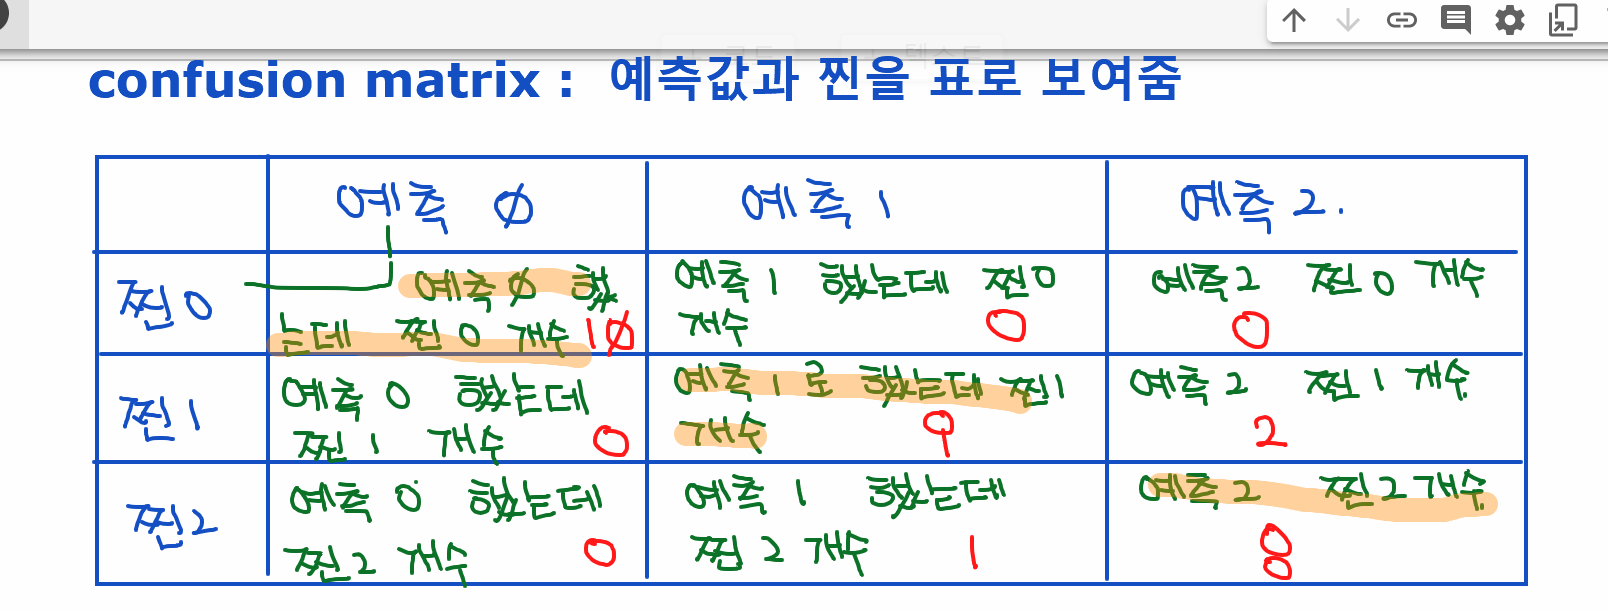

In [38]:
# 예측 1의 정밀도(precision): 1로 예측한 데이터 중에서 찐 1의 비율
9 / (0+9+1)

0.9

In [39]:
# 예측 1의 재현율(recall): 찐 1인 데이터 중에서 찐 1의 비율
9 /(0+9+2)

0.8181818181818182

In [40]:
# 예측 2의 정밀도(precision): 2로 예측한 데이터 중에서 찐 2의 비율
8 / (0+2+8)

0.8

In [41]:
# 예측 2의 재현율(recall): 찐 2인 데이터 중에서 찐 2의 비율
8 /(0+1+8)

0.8888888888888888

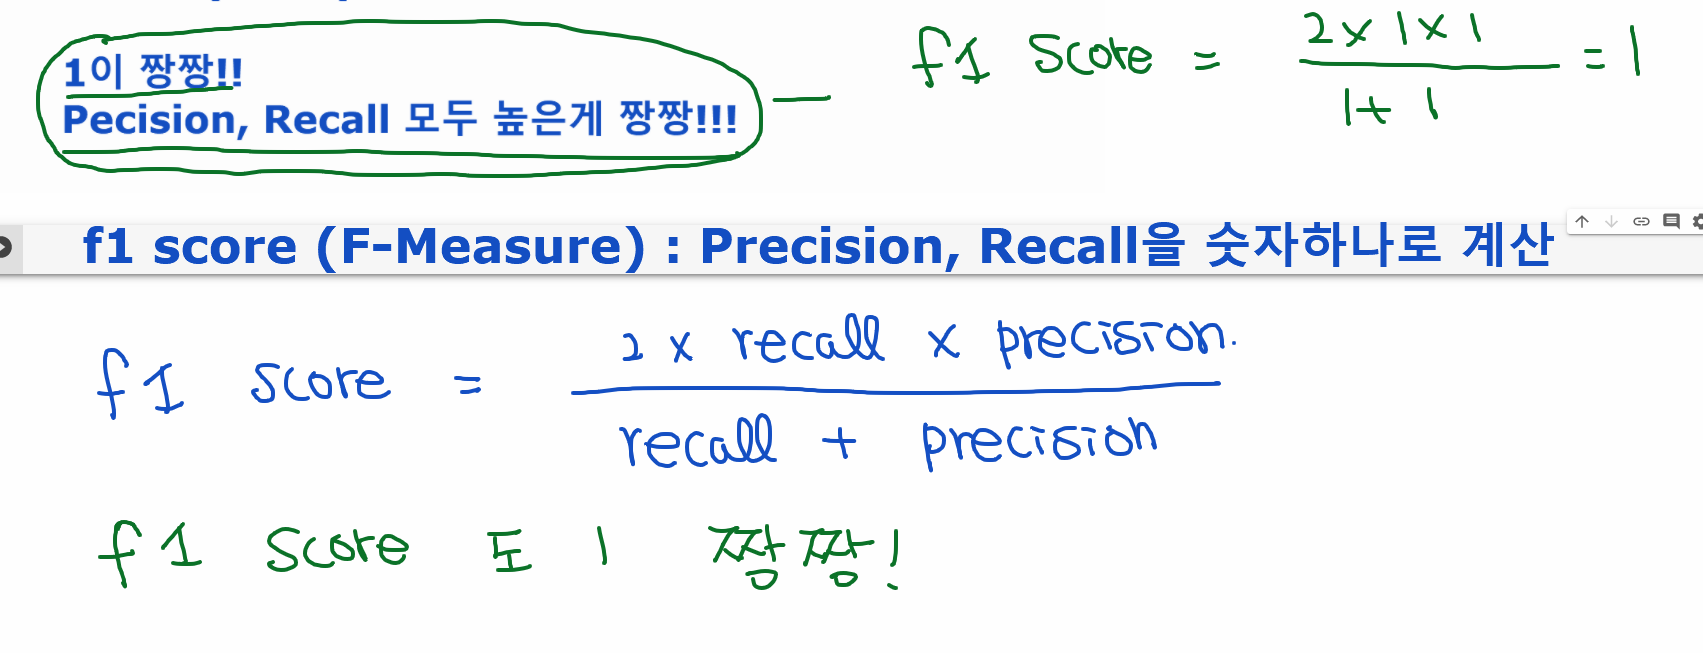

In [45]:
# 1의 F1 score(F-Measure) 계산
(2 * 0.9 * 0.8182) / (0.9 + 0.8182)

0.8571528343615412

In [46]:
# 2의 F1 score(F-Measure) 계산
(2 * 0.8 * 0.89) / (0.8 + 0.89)

0.8426035502958581

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.86      1.00      0.92        12
           2       1.00      0.71      0.83         7

    accuracy                           0.93        30
   macro avg       0.95      0.90      0.92        30
weighted avg       0.94      0.93      0.93        30



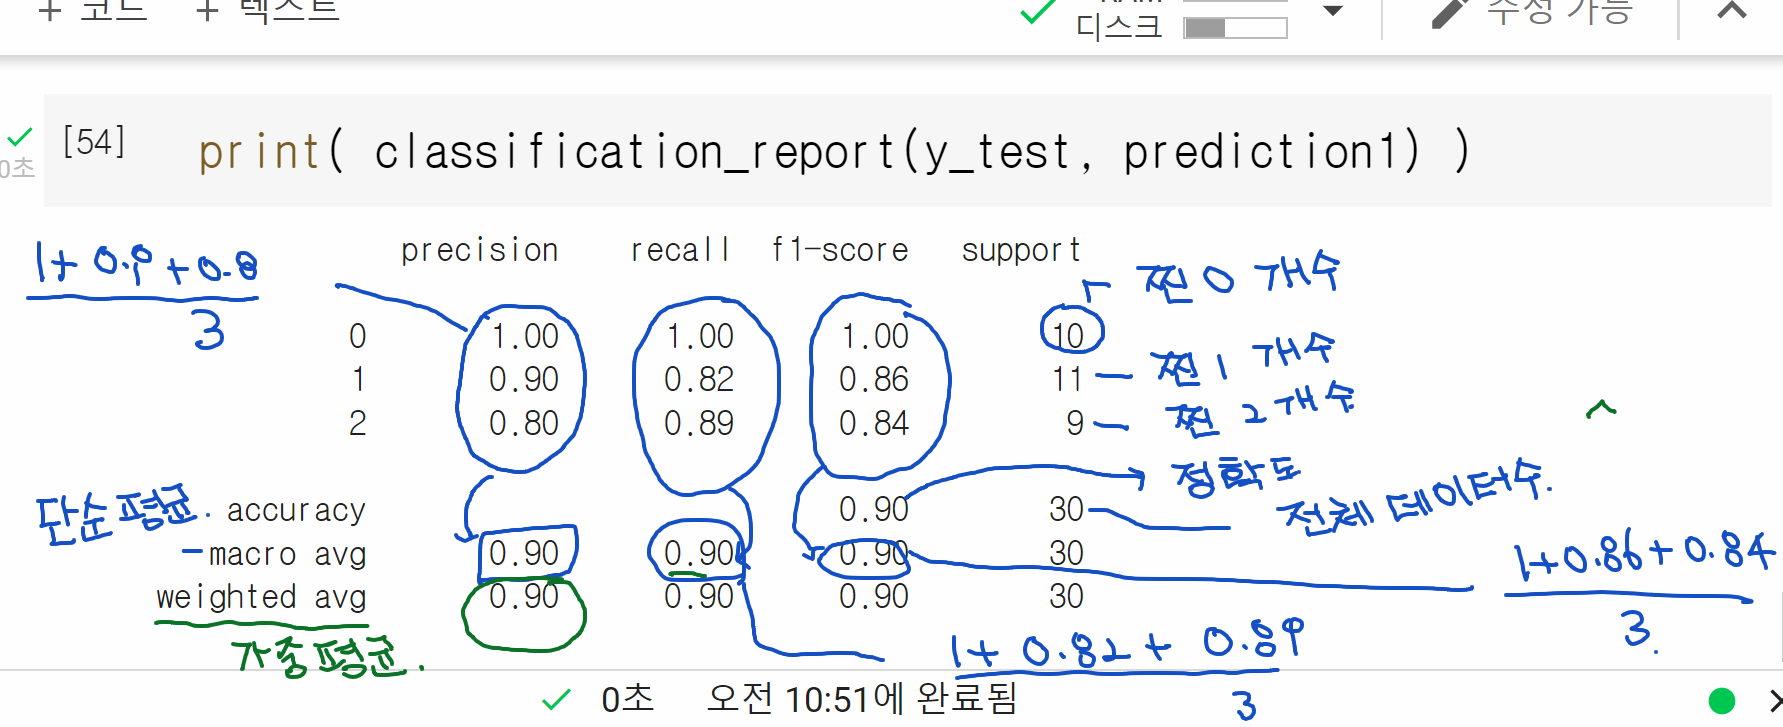

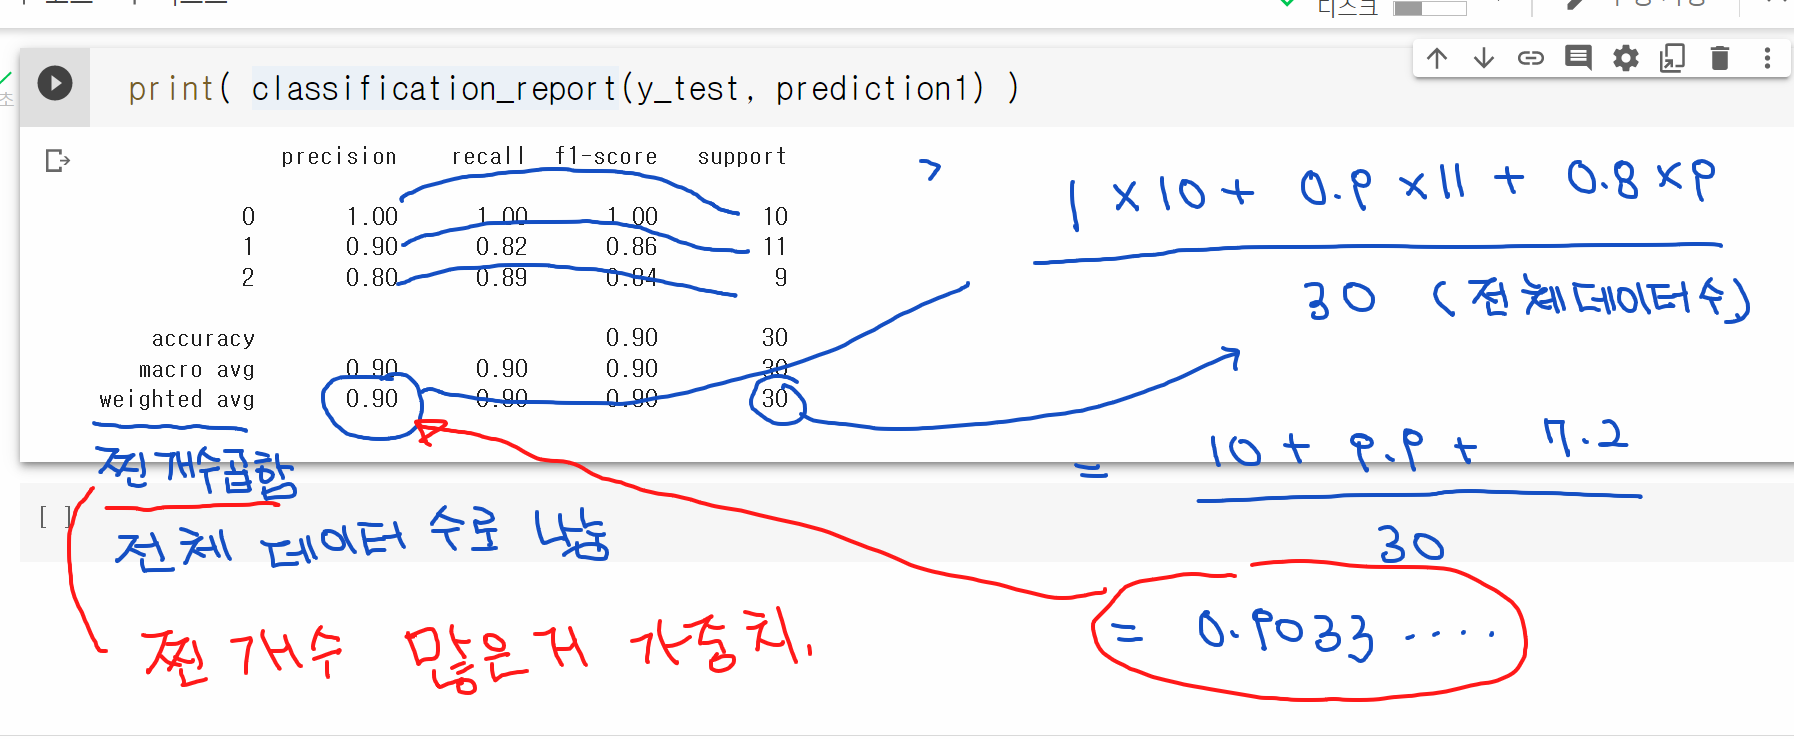

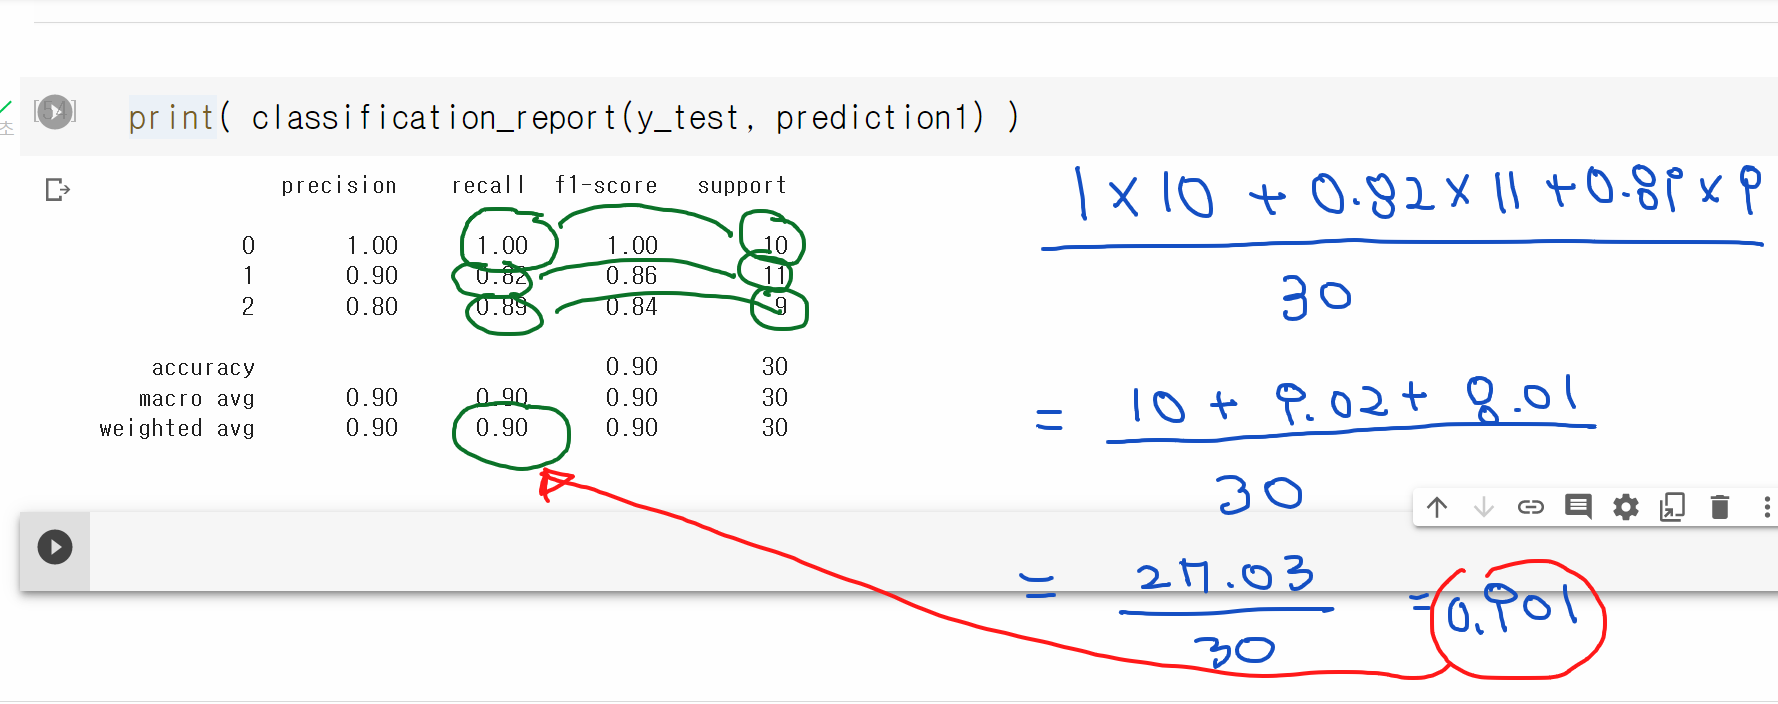